<a href="https://colab.research.google.com/github/hansuho113/SwUniv_CancerAnalysis/blob/main/Colab_Notebook/Suho/drug_gene_onehot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  
drive.mount("/content/drive")

Mounted at /content/drive


# Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

# Load Data

## measure_of_response:
- ['unknown', 'Complete Response', 'Partial Response', 'Clinical Progressive Disease', 'Stable Disease']

## therapy_response:
- ['unknown', 'response', 'no response']

In [ ]:
original_df = pd.read_csv('/content/drive/MyDrive/SW21Project/drug_gene_preprocessed.csv')

# Data Preprocessing
## one_hot_encoding

In [ ]:
# one_hot_encoding
df = original_df.copy()
df = pd.get_dummies(data=df,
                    columns=['regimen_indication', 'therapy_types', 'drug_name_'])

In [ ]:
df.drop(['measure_of_response', 'bcr_patient_barcode'], axis=1, inplace=True)

In [ ]:
df.head(1)

,index,therapy_response,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2M|2,A2ML1|144568,A4GALT|53947,A4GNT|51146,AAA1|404744,...,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,regimen_indication_ADJUVANT,"regimen_indication_OTHER, SPECIFY IN NOTES",regimen_indication_PROGRESSION,regimen_indication_RECURRENCE,regimen_indication_unknown,therapy_types_Ancillary,therapy_types_Chemotherapy,therapy_types_Immunotherapy,"therapy_types_Other, specify in notesAncillary","therapy_types_Other, specify in notesAncillary Agent","therapy_types_Other, specify in notesancillary",therapy_types_Targeted Molecular therapy,therapy_types_unknown,drug_name__bevacizumab,drug_name__capecitabine,drug_name__fluorouracil,drug_name__folinic,drug_name__irinotecan,drug_name__oxaliplatin
0,TCGA-A6-6648-01A-11R-1774-07,unknown,0.0,14.1703,12.2592,324.308,713.85,0.0,152.732,0.5083,0.0,0.0,0.0,3.0496,2.033,0.0,0.0,0.0,0.0,0.0,0.0,732.147,12.4524,0.0,31.5121,0.0,0.0,2.033,0.5083,506.48,0.5083,6.7929,191.614,6.8615,101.741,4753.24,0.2541,48.0305,0.0,0.2541,...,134.435,1.7789,518.678,0.0,309.022,240.661,703.939,488.437,110.066,233.799,892.503,940.455,1146.63,66.8361,558.577,988.31,1.0165,1029.22,2791.87,2283.1,1205.59,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# keras sequential model
- ## split the data to feature and target

In [ ]:
data = np.array(df[df.columns.difference(["index", 'therapy_response'])])
target = np.array(df.therapy_response)

np.asarray(data).astype('float32')

encoder = LabelEncoder()
encoder.fit(target)
labels = encoder.transform(target)

target = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
print(X_train.shape[1:])

(20550,)


In [ ]:
inputs = keras.Input(shape=X_train.shape[1:])
dense = layers.Dense(100, activation='relu')

x = dense(inputs)
x = layers.Dense(100, activation='relu')(x)

x = layers.Dense(100, activation='relu')(x)

outputs = layers.Dense(3, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name='drug_res_prediction')
model.summary()

Model: "drug_res_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20550)]           0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               2055100   
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 2,075,603
Trainable params: 2,075,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 0s 47ms/step - loss: 58.1129 - accuracy: 0.9247 - val_loss: 215.9860 - val_accuracy: 0.7838
Epoch 2/100
5/5 [==============================] - 0s 31ms/step - loss: 67.5065 - accuracy: 0.9521 - val_loss: 141.1481 - val_accuracy: 0.8649
Epoch 3/100
5/5 [==============================] - 0s 30ms/step - loss: 25.6228 - accuracy: 0.8973 - val_loss: 131.5981 - val_accuracy: 0.8378
Epoch 4/100
5/5 [==============================] - 0s 30ms/step - loss: 39.0027 - accuracy: 0.9247 - val_loss: 295.1196 - val_accuracy: 0.7838
Epoch 5/100
5/5 [==============================] - 0s 31ms/step - loss: 88.5265 - accuracy: 0.8973 - val_loss: 131.0500 - val_accuracy: 0.8919
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 90.7019 - accuracy: 0.8904 - val_loss: 165.8459 - val_accuracy: 0.8108
Epoch 7/100
5/5 [==============================] - 0s 33ms/step - loss: 110.0907 - accuracy: 0.8767 - val_loss: 253.4665 - val_accuracy: 0.783

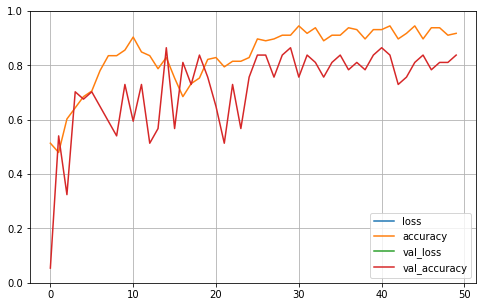

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)    # 수직축 범위 [0-1] 사이로 설정
plt.show()